In [0]:
#importing required pyhon libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [37]:
#importing Review dataset
dataset = pd.read_csv('/gdrive/My Drive/Dataset/Datafiniti_Hotel_Reviews.csv')
dataset.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


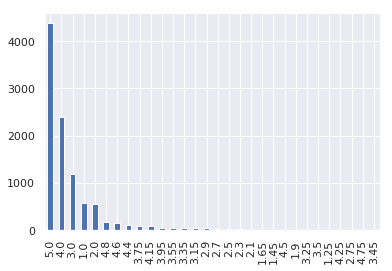

In [38]:
dataset['reviews.rating'].value_counts().plot(kind='bar')

In [39]:
kmeans_x = dataset.iloc[:,[1,16,18]].values
Reviews = kmeans_x[:,2]
import re
import nltk
nltk.download('stopwords')
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for num in range(0,10000):
  review = re.sub('[^a-zA-Z]' , ' ' , str(Reviews[num]))
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
#Creating the Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [0]:
m = 0
n = 0
kmeans_previous_date = ''
kmeans_previoues_review = ''
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
data_list=[]

In [42]:
for app in kmeans_x[:,2]:
  data_list.append(app)

for word in data_list:
  if(sid.polarity_scores(str(word))['compound']) >= 0.5:
    pos_word_list.append(word)
    kmeans_previous_date = kmeans_x[m,0]
    kmeans_previoues_review = kmeans_x[m,2]
    kmeans_x[m,2] = int(1)
  elif(sid.polarity_scores(str(word))['compound']) <= -0.5:
    kmeans_previous_date = kmeans_x[m,0]
    kmeans_previoues_review = kmeans_x[m,2]
    neg_word_list.append(word)
    kmeans_x[m,2] = int(0)
  else:
    neu_word_list.append(word)
    kmeans_x[m,2] = int(1)
  m = m+1
print(len(pos_word_list))
print(len(neg_word_list))
print(len(neu_word_list))

7388
769
1843


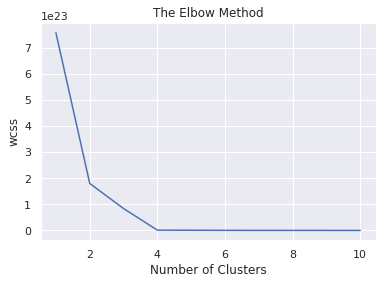

In [43]:
Y = kmeans_x[:,2]

import re
i = 0

for row in kmeans_x:
    d = re.sub('[^0-9]','',str(kmeans_x[i,0]))
    kmeans_x[i,0] = d
    i = i+1

wcss = []
for z in range(1, 11):
    kmeans = KMeans(n_clusters = z , init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(kmeans_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(kmeans_x)
labels = kmeans.labels_
from collections import Counter, defaultdict
print(Counter(labels))
index = [kmeans_x[0] for kmeans_x, value in np.ndenumerate(labels) if value==0 ]
count = 0
count_label_one = 0
count_label_two = 0
count_label_three = 0
count_label_four = 0
count_label_five = 0
rating_five = 0
rating = 0
ie = 0
ie_one = 0
count_one = 0
ie_two = 0
count_two = 0
ie_three = 0
count_three = 0
ie_four = 0
count_four = 0
for si in index:
  count = count + 1
  kmeans_value = kmeans_x[kmeans.labels_==0][ie]
  if kmeans_value[1] >= 1.0 and kmeans_value[1] <= 1.9:
    count_label_one = count_label_one + 1
  if kmeans_value[1] >= 2.0 and kmeans_value[1] <= 2.9:
    count_label_two = count_label_two + 1
  if kmeans_value[1] >= 3.0 and kmeans_value[1] <= 3.9:
    count_label_three = count_label_three + 1
  if kmeans_value[1] >= 4.0 and kmeans_value[1] <= 4.9:
    count_label_four = count_label_four + 1
  if kmeans_value[1] >= 5.0 and kmeans_value[1] <= 5.9:
    count_label_five = count_label_five + 1
  ie = ie+1
  
index_one = [kmeans_x[0] for kmeans_x, value in np.ndenumerate(labels) if value==1 ]
for si_one in index_one:
  count_one = count_one + 1
  kmeans_value_one = kmeans_x[kmeans.labels_==1][ie_one]
  if kmeans_value_one[1] >= 1.0 and kmeans_value_one[1] <= 1.9:
    count_label_one = count_label_one + 1
  if kmeans_value_one[1] >= 2.0 and kmeans_value_one[1] <= 2.9:
    count_label_two = count_label_two + 1
  if kmeans_value_one[1] >= 3.0 and kmeans_value_one[1] <= 3.9:
    count_label_three = count_label_three + 1
  if kmeans_value_one[1] >= 4.0 and kmeans_value_one[1] <= 4.9:
    count_label_four = count_label_four + 1
  if kmeans_value_one[1] >= 5.0 and kmeans_value_one[1] <= 5.9:
    count_label_five = count_label_five + 1
  ie_one = ie_one+1
  
index_two = [kmeans_x[0] for kmeans_x, value in np.ndenumerate(labels) if value==2 ]
for si_two in index_two:
  count_two = count_two + 1
  kmeans_value_two = kmeans_x[kmeans.labels_==2][ie_two]
  if kmeans_value_two[1] >= 1.0 and kmeans_value_two[1] <= 1.9:
    count_label_one = count_label_one + 1 
  if kmeans_value_two[1] >= 2.0 and kmeans_value_two[1] <= 2.9:
    count_label_two = count_label_two + 1
  if kmeans_value_two[1] >= 3.0 and kmeans_value_two[1] <= 3.9:
    count_label_three = count_label_three + 1
  if kmeans_value_two[1] >= 4.0 and kmeans_value_two[1] <= 4.9:
    count_label_four = count_label_four + 1
  if kmeans_value_two[1] >= 5.0 and kmeans_value_two[1] <= 5.9:
    count_label_five = count_label_five + 1
  ie_two = ie_two+1
  
index_three = [kmeans_x[0] for kmeans_x, value in np.ndenumerate(labels) if value==3 ]
for si_three in index_three:
  count_three = count_three + 1
  kmeans_value_three = kmeans_x[kmeans.labels_==3][ie_three]
  if kmeans_value_three[1] >= 1.0 and kmeans_value_three[1] <= 1.9:
    count_label_one = count_label_one + 1 
  if kmeans_value_three[1] >= 2.0 and kmeans_value_three[1] <= 2.9:
    count_label_two = count_label_two + 1
  if kmeans_value_three[1] >= 3.0 and kmeans_value_three[1] <= 3.9:
    count_label_three = count_label_three + 1
  if kmeans_value_three[1] >= 4.0 and kmeans_value_three[1] <= 4.9:
    count_label_four = count_label_four + 1
  if kmeans_value_three[1] >= 5.0 and kmeans_value_three[1] <= 5.9:
    count_label_five = count_label_five + 1
  ie_three = ie_three+1
  
index_four = [kmeans_x[0] for kmeans_x, value in np.ndenumerate(labels) if value==4 ]
for si_four in index_four:
  count_four = count_four + 1
  kmeans_value_four = kmeans_x[kmeans.labels_==4][ie_four]
  if kmeans_value_four[1] >= 1.0 and kmeans_value_four[1] <= 1.9:
    count_label_one = count_label_one + 1 
  if kmeans_value_four[1] >= 2.0 and kmeans_value_four[1] <= 2.9:
    count_label_two = count_label_two + 1
  if kmeans_value_four[1] >= 3.0 and kmeans_value_four[1] <= 3.9:
    count_label_three = count_label_three + 1
  if kmeans_value_four[1] >= 4.0 and kmeans_value_four[1] <= 4.9:
    count_label_four = count_label_four + 1
  if kmeans_value_four[1] >= 5.0 and kmeans_value_four[1] <= 5.9:
    count_label_five = count_label_five + 1
  ie_four = ie_four+1

suggetions = ''  
if count_label_one >= count_label_two and count_label_one >= count_label_three and count_label_one >= count_label_four and count_label_one >= count_label_five:
  rating = 1.0
  suggetions = 'Most of the customers are unhappy to your bussiness. improve it' 
if count_label_two >= count_label_one and count_label_two >= count_label_three and count_label_two >= count_label_four and count_label_two >= count_label_five:
  rating = 2.0
  suggetions = 'Most of the customers are unhappy to your bussiness. improve it'
if count_label_three >= count_label_one and count_label_three >= count_label_two and count_label_three >= count_label_four and count_label_three >= count_label_five:
  rating = 3.0
  suggetions = 'Most of the customers are happy to your bussiness. Great Job'
if count_label_four >= count_label_one and count_label_four >= count_label_two and count_label_four >= count_label_three and count_label_four >= count_label_five:
  rating = 4.0
  suggetions = 'Most of the customers are happy to your bussiness. Great Job'
if count_label_five >= count_label_one and count_label_five >= count_label_two and count_label_five >= count_label_three and count_label_five >= count_label_four:
  rating = 5.0
  suggetions = 'Most of the customers are happy to your bussiness. Great Job'
print(count_label_one)
print(count_label_two)
print(count_label_three)
print(count_label_four)
print(count_label_five)
print('Rating for your shop : ',rating)
print('Suggetion : ',suggetions)

Counter({2: 2624, 1: 2434, 4: 2204, 3: 1464, 0: 1274})
592
661
1410
2901
4384
Rating for your shop :  5.0
Suggetion :  Most of the customers are happy to your bussiness. Great Job


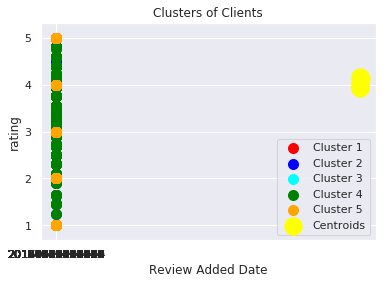

In [45]:
plt.scatter(kmeans_x[y_kmeans == 0 , 0] , kmeans_x[y_kmeans == 0 , 1] , s = 100 , c = 'red' , label = 'Cluster 1')
plt.scatter(kmeans_x[y_kmeans == 1 , 0] , kmeans_x[y_kmeans == 1 , 1] , s = 100 , c = 'blue' , label = 'Cluster 2')
plt.scatter(kmeans_x[y_kmeans == 2 , 0] , kmeans_x[y_kmeans == 2 , 1] , s = 100 , c = 'cyan' , label = 'Cluster 3')
plt.scatter(kmeans_x[y_kmeans == 3 , 0] , kmeans_x[y_kmeans == 3 , 1] , s = 100 , c = 'green' , label = 'Cluster 4')
plt.scatter(kmeans_x[y_kmeans == 4 , 0] , kmeans_x[y_kmeans == 4 , 1] , s = 100 , c = 'orange' , label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s = 300 , c = 'yellow' , label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Review Added Date')
plt.ylabel('rating')
plt.legend()
plt.show()

[[  21  165]
 [  14 2300]]
92.84


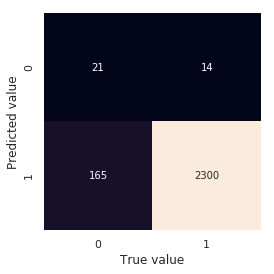

In [46]:
#Use RandomForest classifier to predict the results
from sklearn.model_selection import train_test_split
Y=Y.astype('int')

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy' , random_state = 0 )
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

import seaborn as sns

#print the confusion metrix based on the test values
sns.set()
get_ipython().run_line_magic('matplotlib','inline')
sns.heatmap(cm.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('True value')
plt.ylabel('Predicted value')

Accuracy = ((cm[1,1] + cm[0,0]) / (cm[1,1] + cm[0,0] + cm[1,0] + cm[0,1])*100)
print(Accuracy)

In [47]:
for w in neg_word_list:
  print(w)

I was really disappointed with the TV service. Very few channels and poor quality.
The room key did not work i to go to lobby 4 times no parking under heavy construction noise the staff very incompetent I will not come back to this hotel
Bad: The room rate was terrible we had a Booking.com rate that was not honoured it soured the stay and was a big difference. We to date have no explanation!. Good: Location
Bad: I was supposed to get a room with two beds and ended up with a room with one full bed for me and my husband.it was very small!.
Bad: poor room comfort no room for clothes very old bath accesories high price.
Bad: The pillows were very flat and uncomfortable, and there was no real blanket on the bed!. Good: Location, staff, aesthetics, price.
Bad: Buffet food.
Bad: Thumping music all night long. So loud the windows vibrated.
Bad: 1st - PARKING LOT **BAD,BAD,BAD** This is 2017, nobody need driver to parking car, unless you're 85 yrs old (should not even drive). But drivers that s

In [0]:
def _create_frequency_table(text_string) -> dict:
    """
    we create a dictionary for the word frequency table.
    For this, we should only use the words that are not part of the stopWords array.
    Removing stop words and making frequency table
    Stemmer - an algorithm to bring words to its root word.
    :rtype: dict
    """
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

In [0]:
def _score_sentences(sentences, freqTable) -> dict:
    """
    score a sentence by its words
    Basic algorithm: adding the frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        word_count_in_sentence_except_stop_words = 0
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                word_count_in_sentence_except_stop_words += 1
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        if sentence[:10] in sentenceValue:
            sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] / word_count_in_sentence_except_stop_words

        '''
        Notice that a potential issue with our score algorithm is that long sentences will have an advantage over short sentences. 
        To solve this, we're dividing every sentence score by the number of words in the sentence.
        
        Note that here sentence[:10] is the first 10 character of any sentence, this is to save memory while saving keys of
        the dictionary.
        '''

        return sentenceValue

In [0]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = (sumValues / len(sentenceValue))

    return average

In [0]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [0]:
def run_summarization(text):
    # 1 Create the word frequency table
    freq_table = _create_frequency_table(text)

    '''
    We already have a sentence tokenizer, so we just need 
    to run the sent_tokenize() method to create the array of sentences.
    '''

    # 2 Tokenize the sentences
    sentences = sent_tokenize(text)

    # 3 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(sentences, freq_table)

    # 4 Find the threshold
    threshold = _find_average_score(sentence_scores)

    # 5 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, threshold)

    return summary

In [53]:
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
it = 0
for t in neg_word_list:
  text_str = neg_word_list[it]
  #print(text_str)

  # 1 Create the word frequency table
  freq_table = _create_frequency_table(text_str)

  '''
  We already have a sentence tokenizer, so we just need 
  to run the sent_tokenize() method to create the array of sentences.
  '''

  # 2 Tokenize the sentences
  sentences = sent_tokenize(text_str)

  # 3 Important Algorithm: score the sentences
  sentence_scores = _score_sentences(sentences, freq_table)

  # 4 Find the threshold
  threshold = _find_average_score(sentence_scores)

  # 5 Important Algorithm: Generate the summary
  summary = _generate_summary(sentences, sentence_scores,  1.3 * threshold)

  result = run_summarization(text_str)

  #print(freq_table)
  #print(sentences)
  #print(sentence_scores)
  #print(threshold)
  #print(summary)
  print(result)
  it = it +1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
 I was really disappointed with the TV service.
 The room key did not work i to go to lobby 4 times no parking under heavy construction noise the staff very incompetent I will not come back to this hotel
 Bad: The room rate was terrible we had a Booking.com rate that was not honoured it soured the stay and was a big difference.
 Bad: I was supposed to get a room with two beds and ended up with a room with one full bed for me and my husband.it was very small!.
 Bad: poor room comfort no room for clothes very old bath accesories high price.
 Bad: The pillows were very flat and uncomfortable, and there was no real blanket on the bed!.
 Bad: Buffet food.
 Bad: Thumping music all night long.
 Bad: 1st - PARKING LOT **BAD,BAD,BAD** This is 2017, nobody need driver to parking car, unless you're 85 yrs old (should not even drive).
 Bad: Dirty and old room.
 Bad: The hotel is very tire

In [54]:
array_append = []
tok = []
z = 0
for word in result:
  array_append.append(neg_word_list[z])
  tok.append(re.findall('\w+',array_append[z]))
  z = z+1
print(array_append)
print(tok[:])

['I was really disappointed with the TV service. Very few channels and poor quality.', 'The room key did not work i to go to lobby 4 times no parking under heavy construction noise the staff very incompetent I will not come back to this hotel', 'Bad: The room rate was terrible we had a Booking.com rate that was not honoured it soured the stay and was a big difference. We to date have no explanation!. Good: Location', 'Bad: I was supposed to get a room with two beds and ended up with a room with one full bed for me and my husband.it was very small!.', 'Bad: poor room comfort no room for clothes very old bath accesories high price.', 'Bad: The pillows were very flat and uncomfortable, and there was no real blanket on the bed!. Good: Location, staff, aesthetics, price.', 'Bad: Buffet food.', 'Bad: Thumping music all night long. So loud the windows vibrated.', "Bad: 1st - PARKING LOT **BAD,BAD,BAD** This is 2017, nobody need driver to parking car, unless you're 85 yrs old (should not even 

In [55]:
wds = []
for word in tok:
  wds.append(str(word).lower())

wds[:8]

["['i', 'was', 'really', 'disappointed', 'with', 'the', 'tv', 'service', 'very', 'few', 'channels', 'and', 'poor', 'quality']",
 "['the', 'room', 'key', 'did', 'not', 'work', 'i', 'to', 'go', 'to', 'lobby', '4', 'times', 'no', 'parking', 'under', 'heavy', 'construction', 'noise', 'the', 'staff', 'very', 'incompetent', 'i', 'will', 'not', 'come', 'back', 'to', 'this', 'hotel']",
 "['bad', 'the', 'room', 'rate', 'was', 'terrible', 'we', 'had', 'a', 'booking', 'com', 'rate', 'that', 'was', 'not', 'honoured', 'it', 'soured', 'the', 'stay', 'and', 'was', 'a', 'big', 'difference', 'we', 'to', 'date', 'have', 'no', 'explanation', 'good', 'location']",
 "['bad', 'i', 'was', 'supposed', 'to', 'get', 'a', 'room', 'with', 'two', 'beds', 'and', 'ended', 'up', 'with', 'a', 'room', 'with', 'one', 'full', 'bed', 'for', 'me', 'and', 'my', 'husband', 'it', 'was', 'very', 'small']",
 "['bad', 'poor', 'room', 'comfort', 'no', 'room', 'for', 'clothes', 'very', 'old', 'bath', 'accesories', 'high', 'price']

In [56]:
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [57]:
words_ns = []
for word in wds:
  if word not in sw:
    words_ns.append(word)
words_ns[:5]

["['i', 'was', 'really', 'disappointed', 'with', 'the', 'tv', 'service', 'very', 'few', 'channels', 'and', 'poor', 'quality']",
 "['the', 'room', 'key', 'did', 'not', 'work', 'i', 'to', 'go', 'to', 'lobby', '4', 'times', 'no', 'parking', 'under', 'heavy', 'construction', 'noise', 'the', 'staff', 'very', 'incompetent', 'i', 'will', 'not', 'come', 'back', 'to', 'this', 'hotel']",
 "['bad', 'the', 'room', 'rate', 'was', 'terrible', 'we', 'had', 'a', 'booking', 'com', 'rate', 'that', 'was', 'not', 'honoured', 'it', 'soured', 'the', 'stay', 'and', 'was', 'a', 'big', 'difference', 'we', 'to', 'date', 'have', 'no', 'explanation', 'good', 'location']",
 "['bad', 'i', 'was', 'supposed', 'to', 'get', 'a', 'room', 'with', 'two', 'beds', 'and', 'ended', 'up', 'with', 'a', 'room', 'with', 'one', 'full', 'bed', 'for', 'me', 'and', 'my', 'husband', 'it', 'was', 'very', 'small']",
 "['bad', 'poor', 'room', 'comfort', 'no', 'room', 'for', 'clothes', 'very', 'old', 'bath', 'accesories', 'high', 'price']

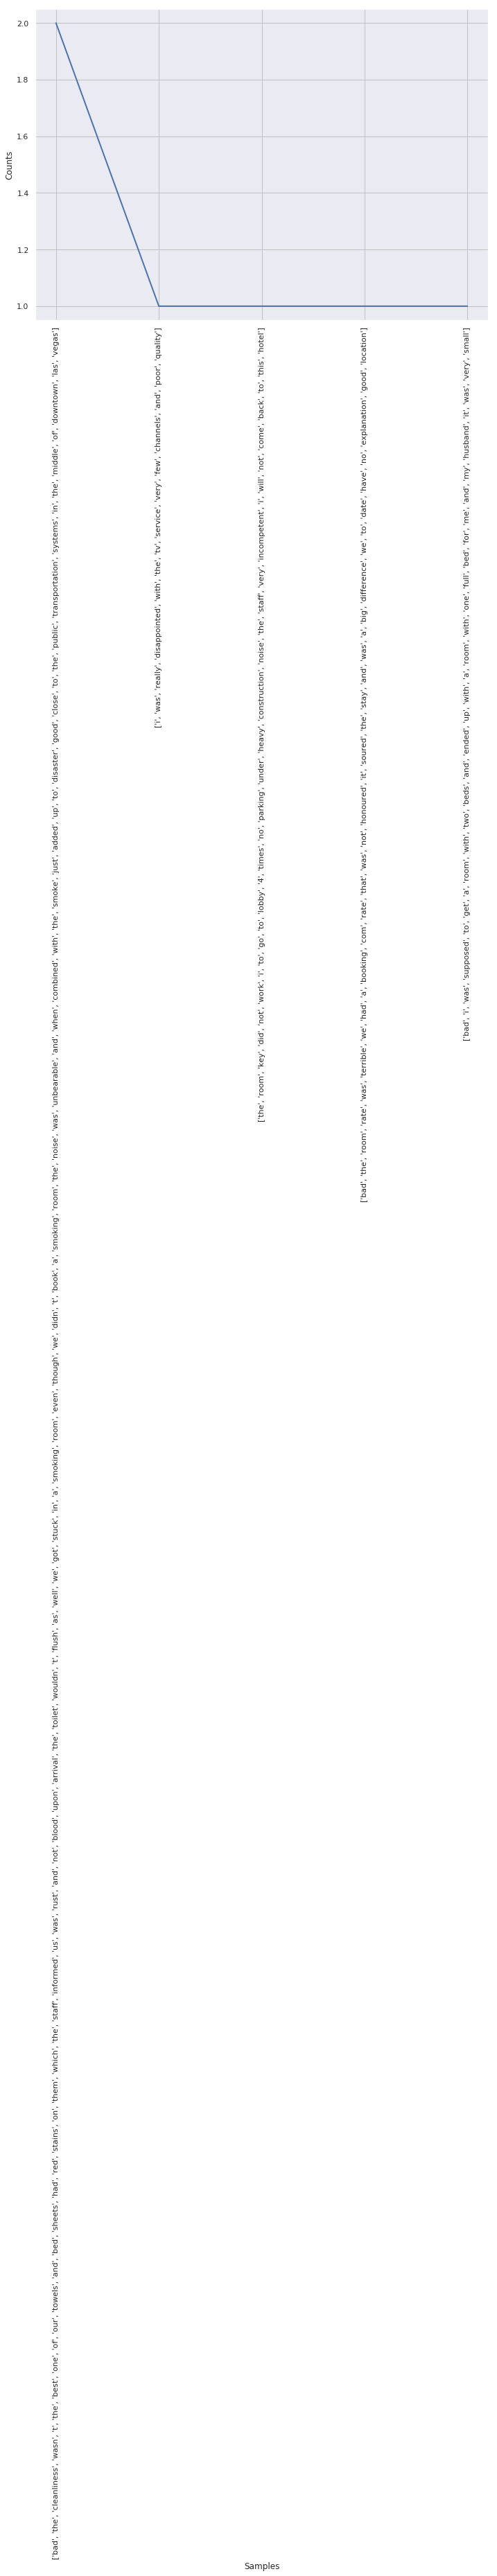

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

nlp_words = nltk.FreqDist(words_ns)
nlp_words.plot(5)

In [59]:
print('Final Results')
print('No of Possitive Reviews - ',len(pos_word_list))
print('No of Negative Reviews - ',len(neg_word_list))
print('No of Neural Reviews - ',len(neu_word_list))
print('Ratings for your shop - ',rating)
print('Accuracy of an algorithm - ',Accuracy)

Final Results
No of Possitive Reviews -  7388
No of Negative Reviews -  769
No of Neural Reviews -  1843
Ratings for your shop -  5.0
Accuracy of an algorithm -  92.84
